With SL regression, we want to learn a function approximator (FA) `f(x, w)`, where `x` is the input (variable) and `w` is the weights vectors (learnable parameter).  
The goal is that our FA should fit an unknown function `y` such that, given any `x` it will predict the corresponding `y`.  
The variable `x` is continuous, thus can have infinitely many values. To train our FA, we are given a dataset `{x_i, y_i}` of sample pairs. The easiest regression we can do is mean-square regression, where we minimize the mean-square error of our prediction `(y - y_hat)^2` by gradient descent, where `y_hat = f(x, w)`. 

Sometimes (most of the time), the output `y` depends on the elements of the input `x` in a particular way. For example, say `x = (x_1, x_2)`. There could be a quadratic relationship, i.e., `y = w_1 * x_1**2 + w_2 * x_2**2`. In this case, `x_1**2` and `x_2**2` are called **features**, i.e., values derived from the state that represent and describe it. One challenge of regression (and machine learning in general) is to find the best features, i.e., the ones that describe the input-output relationship the best. 

Let's consider a real-world prediction problem, i.e., weather forecasting.  
Your dataset is `(humidity, temperature, wind, chances_of_rain)`. In this case, `humidity`, `temperature`, and `wind` are the element of the state `x` (or, to be more precise, observations of the true state, because maybe there is more that we cannot observe), while `chances_of_rain` is our target `y`.  
Features will be "values based on the state that help predicting the target". For example, assume that the higher the humidity and the lower the temperature, the higher the chances of rain are. Then, a good feature would be `humidity * temperature`.  
However, we also notice that if the temperature is too low, then chances of rain decrease (e.g., it will snow instead). Therefore, we could say that a good features is `temperature**2`.  
Finally, we see no correlation between wind and chances of rain, so we can ignore it.  
In this scenario, we could use the following FA: `chances_of_rain = w_1 * humidity * temperature + w_2 * temperature**2`.  
And then learn the exact weight with regression (given what we assumed, probably `w_1` will be positive and `w_2` will be negative).

The above is an example of **polynomial** features. The book already discuss them, so here we don't write their mathemathical notation again.  
Let's consider a simple cubic function, i.e., polynomial of degree 3 `f(x, w) = w_0 + w_1 * x + w_2 * x**2 + w_3 * x**3` and let's have a visual representation 
of how the weights affect the shape of the function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

w = np.zeros(4)
x = np.linspace(-10, 10, 100)
phi = lambda x: np.array([np.ones_like(x), x, x**2, x**3])
y_hat = lambda x, w: (phi(x).T * w).sum(-1)

This is a simplified scenario, where we assume `x` in `[-10, 10]` and we have a uniform dataset. In general, `x` may be unbounded and the dataset 
may be scattered and not uniform. 

Below, we plot the features one by one, then we sum them with all weights `1`, and finally with random weights.

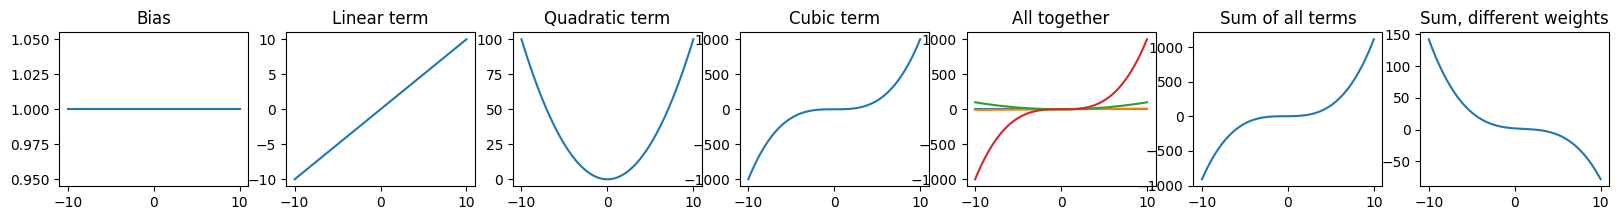

In [3]:
fig, axs = plt.subplots(1, 7, figsize=(20, 2))

w[:] = 0.0
w[0] = 1.0
axs[0].plot(x, y_hat(x, w)) # plot the bias (degree 0)
axs[0].set_title("Bias")

w[:] = 0.0
w[1] = 1.0
axs[1].plot(x, y_hat(x, w)) # plot linear term (degree 1)
axs[1].set_title("Linear term")

w[:] = 0.0
w[2] = 1.0
axs[2].plot(x, y_hat(x, w)) # plot quadratic term (degree 2)
axs[2].set_title("Quadratic term")

w[:] = 0.0
w[3] = 1.0
axs[3].plot(x, y_hat(x, w)) # plot cubic term (degree 3)
axs[3].set_title("Cubic term")

for i in range(4):
    w[:] = 0.0
    w[i] = 1.0
    axs[4].plot(x, y_hat(x, w))
axs[4].set_title("All together")

w[:] = 1.0
axs[5].plot(x, y_hat(x, w)) # plot all
axs[5].set_title("Sum of all terms")

w[0] = 2.0
w[1] = -1.0
w[2] = 0.3
w[3] = -0.1
axs[6].plot(x, y_hat(x, w)) # change their weights
axs[6].set_title("Sum, different weights")

plt.show()

Basically, each component helps shaping the final output:
- Yhe bias "shifts" the function up/down on the y axis,
- The linear term "rotates" the function,
- The quadratic and higher terms further "stretch" the function.

Now let's consider the function `y` below and some weights `w` for the cubic polynomial approximation learned with gradient descent, and see how they help producing the final output.

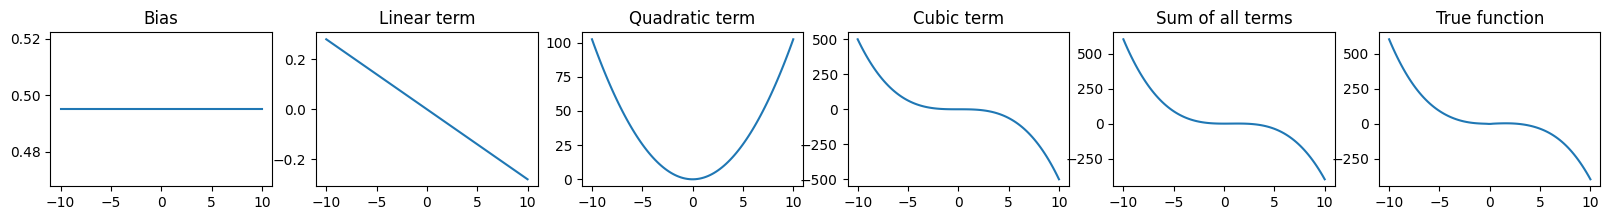

In [4]:
x = np.linspace(-10, 10, 100)
y = np.sin(x) + x**2 - 0.5 * x**3 + np.log(np.abs(x))
w_learned = np.array([0.495, -0.028,  1.024, -0.499])

fig, axs = plt.subplots(1, 6, figsize=(20, 2))

w[:] = 0
w[0] = w_learned[0]
axs[0].plot(x, y_hat(x, w))
axs[0].set_title("Bias")

w[:] = 0
w[1] = w_learned[1]
axs[1].plot(x, y_hat(x, w))
axs[1].set_title("Linear term")

w[:] = 0
w[2] = w_learned[2]
axs[2].plot(x, y_hat(x, w))
axs[2].set_title("Quadratic term")

w[:] = 0
w[3] = w_learned[3]
axs[3].plot(x, y_hat(x, w))
axs[3].set_title("Cubic term")

axs[4].plot(x, y_hat(x, w_learned))
axs[4].set_title("Sum of all terms")

axs[5].plot(x, y)
axs[5].set_title("True function")

plt.show()

Intuitively, the cubic term does "most of the work", giving the main shape,
the quadratic term pushes the edges further up/down, without changing the "middle" too much,
the linear term has very little impact (its weight is very small: -0.028), 
and the bias just shifts the function a bit, since it is not centered in 0.

The problem with poly features is that:
- They are smooth, so to fit "spikes" we need to have many degrees and give very high/low weights to some,
- They are unbounded, so a poly of degree 7 can have already very large values.
  
The latter is a problem with gradient descent, because the gradient can quickly diverge unless we normalize it. 

This is where features like coarse coding, tile coding, and RBFs help. 

Below, we focus on RBFs but the same principles apply to tile coding and coarse coding. 
Again: no math, that's in the book. 

When we talk about RBFs, think about each feature (Gaussian) as an "activation function" with peak response when the input pattern is close to the Gaussian mean. ("Close" in the sense that we compute the Euclidean distance and then we exponentiate it).  
Each feature basically generates a "bump" (a value in `[0, 1]`), and a superposition of such "bumps" can then be used to approximate an arbitrary function. 

The role of the weights `w` is to then scale the activation values (features) to fit the target.

In [5]:
phi = lambda x, c, s: np.exp(-((x[:, None] - c[None, :])**2) / s**2 / 2.0)
s = 2.0  # sigma, i.e., the standard deviation of Gaussian, i.e., the width of the basis
n_centers = 20
c = np.linspace(-11, 11, n_centers)
w = np.zeros(n_centers)
y_hat = lambda x, w: (phi(x, c, s) * w).sum(-1)

First, we placed the centers and select the widths (standard deviation `sigma`) of the bases. 
A common choice, when we know little about the target function, it so place center uniformly. 
In this case, we placed 20 of them. 
There are also rules of thumb for the width, but here we just use `2.0`.

Note that this implementation is simple and uses the same `sigma` for every center and dimension of the input `x`. 
Also, it considers only 1-dimensional `x` and it won't work for multi-dimensional `x`.

Note: we placed the centers slightly outside of the `x` range. The reason is that we don't want to have peaks 
at the edges, otherwise "smoothing" them will be harder. 

Like we did for the poly, let's plot the bases (just the first 3 out of 20) and then all together. 
Then, we consider some weights learned with gradient descent plot the RBFs weighted according to them.


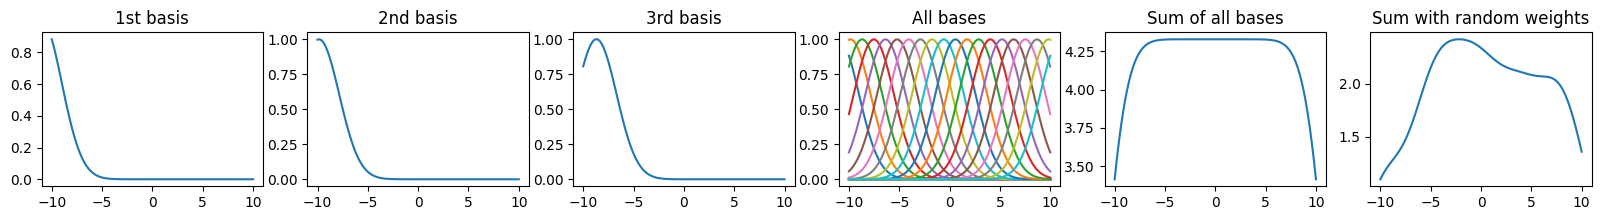

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(20, 2))

w[:] = 0.0
w[0] = 1.0
axs[0].plot(x, y_hat(x, w))
axs[0].set_title("1st basis")

w[:] = 0.0
w[1] = 1.0
axs[1].plot(x, y_hat(x, w))
axs[1].set_title("2nd basis")

w[:] = 0.0
w[2] = 1.0
axs[2].plot(x, y_hat(x, w))
axs[2].set_title("3rd basis")

for i in range(20):
    w[:] = 0.0
    w[i] = 1.0
    axs[3].plot(x, y_hat(x, w))
axs[3].set_title("All bases")

w[:] = 1.0
axs[4].plot(x, y_hat(x, w))
axs[4].set_title("Sum of all bases")

w = np.random.rand(n_centers)
axs[5].plot(x, y_hat(x, w)) # random weights
axs[5].set_title("Sum with random weights")

plt.show()

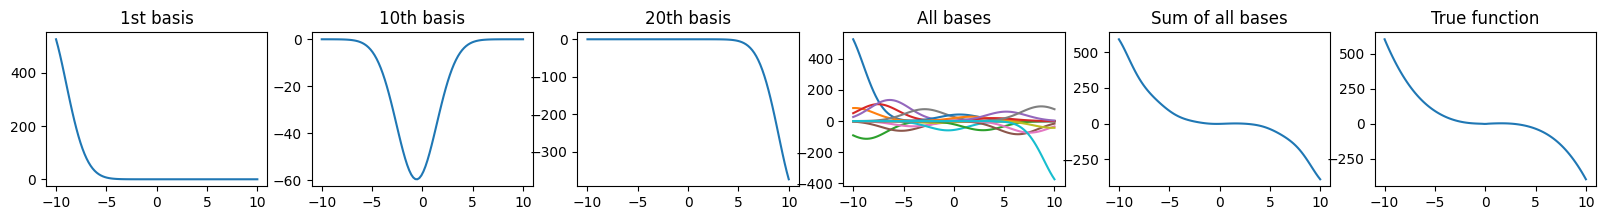

In [7]:
w_learned = np.array([
    595.0120012971349,
    83.71908336613362,
    -113.86150041563025,
    108.41057342079829,
    135.50759475165273,
    -62.46098480818544,
    -33.73002526529345,
    76.29279496712232,
    -11.90247970630466,
    -59.671158602876915,
    42.12035096367887,
    27.922376666635344,
    -58.748134296752326,
    18.7738323870433,
    60.4911911925224,
    -84.67426993566218,
    -74.44866939543373,
    94.35708381207264,
    -43.4040076519618,
    -423.568490966863,
])

fig, axs = plt.subplots(1, 6, figsize=(20, 2))

w[:] = 0
w[0] = w_learned[0]
axs[0].plot(x, y_hat(x, w))
axs[0].set_title("1st basis")

w[:] = 0
w[9] = w_learned[9]
axs[1].plot(x, y_hat(x, w))
axs[1].set_title("10th basis")

w[:] = 0
w[-1] = w_learned[-1]
axs[2].plot(x, y_hat(x, w))
axs[2].set_title("20th basis")

for i in range(n_centers):
    w[:] = 0
    w[i] = w_learned[i]
    axs[3].plot(x, y_hat(x, w))
axs[3].set_title("All bases")

axs[4].plot(x, y_hat(x, w_learned))
axs[4].set_title("Sum of all bases")

axs[5].plot(x, y)
axs[5].set_title("True function")

plt.show()

Note one important difference with poly functions: we didn't need to add the bias. 
Weights can be adjusted such that the bases "compensate" for the lack of bias. 

For example, below we are adding 1.5 bias and changing the weights, but still fit 
the same function (almost, we can get better weights to work).

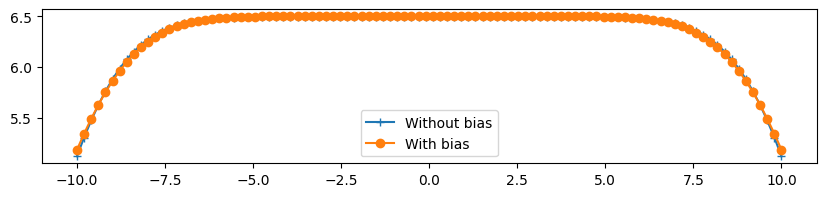

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2))
w[:] = 1.5
y_nobias = y_hat(x, w)
axs.plot(x, y_nobias, marker="+", label="Without bias")
w[:] = 1.155
w[0] -= 0.35
w[1] += 0.05
w[-2] += 0.05
w[-1] -= 0.35
y_bias = 1.5 + y_hat(x, w)
axs.plot(x, y_bias, marker="o", label="With bias")
plt.legend()
plt.show()

In general, both RBFs and polynomials can be universal function approximators (UFA). 

As discussed above, each RBFs generates a "bump", and we can generate any function given "infinitely many bumps". 

[Polynomials can also approximate any function](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem), given "infinite degree". 
Clearly, though, things are numerically not "as easy" as RBFs, because the value of polynomials is unbounded, while the activation of RBFs is within `[0, 1]`. In practice, RBFs are much more common than poly. 

As "assignment", try to fit the function `y = 3 + 4*x` with RBFs and poly without bias. You'll see that even a poly of degree 100 can't really fit it, 
while RBFs (without bias) easily can.